In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
import json
from dotenv import load_dotenv

In [1]:
!nvidia-smi

Fri Aug 15 16:52:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 Ti   WDDM  |   00000000:07:00.0  On |                  N/A |
|  0%   43C    P8             17W /  290W |    2014MiB /   8192MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import torch
print("PyTorch:", torch.__version__, "| CUDA:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

PyTorch: 2.5.1+cu121 | CUDA: 12.1
CUDA available: True
GPU: NVIDIA GeForce RTX 3070 Ti


In [3]:
import os
home_path = os.getcwd()
home_path

'c:\\Users\\Aaron\\OneDrive\\Documents\\ComputerVision\\ProjectX'

In [30]:
%pip install ultralytics==8.2.103 -q

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Pip install method (recommended)

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 596.9/1862.3 GB disk)


In [ ]:
from roboflow import Roboflow
load_dotenv()
rbflow_key = os.getenv("roboflow_API")
rf = Roboflow(api_key=rbflow_key)
project = rf.workspace("projectx-ecgoq").project("myprojectx-9vnw2")
version = project.version(11)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to myProjectX-11 in yolov8:: 100%|██████████| 5834/5834 [00:03<00:00, 1683.64it/s]


In [23]:
# %cd {home_path}

# !yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=24 imgsz=640 save=True

home_path

'c:\\Users\\Aaron\\OneDrive\\Documents\\ComputerVision\\ProjectX'

In [ ]:
%cd {home_path}
# model = YOLO('yolov8m.pt') 
model = YOLO('yolov8m-seg.pt')
path = os.path.join(home_path, 'myProjectX-9', 'data.yaml')
result = model.train(data=path, epochs=50, device=0)


c:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX
New https://pypi.org/project/ultralytics/8.3.176 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=c:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-9\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_

train: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-9\train\labels.cache... 2135 images, 9 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
val: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-9\valid\labels.cache... 177 images, 0 backgrounds, 0 corrupt: 100%|██████████| 177/177 [00:00<?, ?it/s]


Plotting labels to runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.34G     0.8924        1.9      1.278      1.119         70        640: 100%|██████████| 134/134 [02:41<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.78s/it]

                   all        177        783      0.557       0.58      0.579      0.374      0.484      0.463      0.461      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.67G      1.053      2.056      1.141      1.208         52        640: 100%|██████████| 134/134 [03:58<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:32<00:00,  5.48s/it]

                   all        177        783      0.552      0.496       0.47      0.279      0.526      0.496      0.453      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.31G      1.085      2.088      1.147      1.238         51        640: 100%|██████████| 134/134 [02:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]

                   all        177        783      0.665      0.555      0.579       0.36      0.652      0.567      0.567      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.62G      1.049      2.022      1.095      1.205         65        640: 100%|██████████| 134/134 [02:38<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:18<00:00,  3.13s/it]

                   all        177        783      0.637      0.544      0.556      0.335      0.605      0.518      0.517      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.58G     0.9924      1.946     0.9828      1.172         45        640: 100%|██████████| 134/134 [02:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.40s/it]

                   all        177        783      0.794       0.62      0.695      0.472      0.783      0.614      0.669      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.41G     0.9642      1.909     0.9524       1.16         45        640: 100%|██████████| 134/134 [02:47<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:23<00:00,  3.94s/it]

                   all        177        783      0.746      0.625      0.695      0.487      0.787      0.603      0.671      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50       8.3G     0.9174      1.822      0.891      1.141         77        640: 100%|██████████| 134/134 [02:58<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.43s/it]

                   all        177        783      0.714      0.646      0.689       0.48      0.719      0.636      0.672      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.63G     0.8939       1.75     0.8491      1.116        127        640: 100%|██████████| 134/134 [03:24<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.82s/it]

                   all        177        783      0.842      0.643      0.724      0.512       0.82      0.629      0.702      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50       8.3G     0.8542       1.68     0.7979      1.096         68        640: 100%|██████████| 134/134 [04:44<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.31s/it]

                   all        177        783      0.827      0.661      0.743      0.527      0.836      0.651      0.728      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.32G     0.8409      1.639      0.789      1.086         15        640: 100%|██████████| 134/134 [03:16<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:31<00:00,  5.20s/it]

                   all        177        783      0.808      0.686       0.75      0.537      0.831       0.67      0.734      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.36G     0.8226      1.636      0.761      1.086         27        640: 100%|██████████| 134/134 [04:13<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:18<00:00,  3.11s/it]

                   all        177        783      0.794      0.676      0.746      0.544      0.776      0.673      0.733      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.66G     0.8012      1.576     0.7186      1.075         76        640: 100%|██████████| 134/134 [03:17<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.65s/it]

                   all        177        783      0.837      0.677      0.752       0.53      0.828      0.667      0.742      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50       8.4G     0.7915      1.566     0.7037      1.062         38        640: 100%|██████████| 134/134 [04:03<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.70s/it]

                   all        177        783      0.823      0.684      0.762      0.562      0.811      0.675      0.747      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50       8.6G     0.7854      1.518     0.6771      1.059         62        640: 100%|██████████| 134/134 [04:14<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:22<00:00,  3.80s/it]

                   all        177        783      0.824      0.687      0.759      0.564      0.825      0.687      0.758      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.37G     0.7537      1.477     0.6477      1.039         70        640: 100%|██████████| 134/134 [04:07<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:23<00:00,  3.99s/it]

                   all        177        783      0.815      0.681      0.756      0.559        0.8      0.669      0.735      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.28G     0.7445      1.433     0.6487      1.042         41        640: 100%|██████████| 134/134 [02:26<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:15<00:00,  2.65s/it]

                   all        177        783       0.82      0.714      0.777      0.563      0.808      0.695      0.751      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50       8.5G      0.728      1.375     0.6202      1.022         34        640: 100%|██████████| 134/134 [03:53<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.96s/it]

                   all        177        783      0.857      0.688      0.761      0.571      0.854      0.679      0.744      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.53G     0.7077      1.372     0.5914      1.014         47        640: 100%|██████████| 134/134 [02:46<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.11s/it]

                   all        177        783      0.896      0.694      0.789      0.587      0.892      0.694      0.784      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.33G     0.7072      1.345     0.5971      1.016         59        640: 100%|██████████| 134/134 [02:40<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]

                   all        177        783      0.821      0.719      0.773       0.58      0.831      0.726      0.777      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.59G     0.6976      1.356     0.5868      1.015         30        640: 100%|██████████| 134/134 [03:44<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.16s/it]

                   all        177        783       0.82      0.712      0.781      0.572      0.824      0.711      0.775       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.62G      0.676      1.288     0.5569     0.9969         72        640: 100%|██████████| 134/134 [04:33<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:21<00:00,  3.56s/it]

                   all        177        783      0.821      0.695      0.764      0.558      0.821      0.689      0.754      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.67G     0.6792      1.295      0.555      1.004         36        640: 100%|██████████| 134/134 [03:47<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.11s/it]

                   all        177        783      0.847      0.725      0.799      0.609      0.882      0.702      0.795      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.54G     0.6692      1.269     0.5336     0.9912         58        640: 100%|██████████| 134/134 [03:34<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.79s/it]

                   all        177        783       0.82      0.738      0.784      0.588      0.814      0.714      0.767      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.63G     0.6567      1.241     0.5247     0.9939         63        640: 100%|██████████| 134/134 [03:29<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:34<00:00,  5.76s/it]

                   all        177        783      0.849      0.712       0.78      0.585      0.853      0.699      0.766       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.34G     0.6484       1.21     0.5081     0.9775         38        640: 100%|██████████| 134/134 [04:01<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.79s/it]

                   all        177        783      0.871      0.693      0.787        0.6      0.868       0.69      0.781      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.59G     0.6376      1.199      0.507     0.9804         55        640: 100%|██████████| 134/134 [03:28<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:39<00:00,  6.56s/it]

                   all        177        783      0.848      0.727      0.794      0.596      0.862      0.705       0.78      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.36G     0.6334      1.188     0.5044     0.9771         73        640: 100%|██████████| 134/134 [05:12<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:25<00:00,  4.25s/it]

                   all        177        783       0.85      0.733      0.811      0.622      0.844      0.727      0.798      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.33G     0.6186      1.142     0.4832      0.972         62        640: 100%|██████████| 134/134 [03:33<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:25<00:00,  4.27s/it]

                   all        177        783      0.858      0.727      0.794      0.616      0.856      0.728      0.786      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.57G     0.6079      1.149      0.476      0.966         48        640: 100%|██████████| 134/134 [02:50<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.91s/it]

                   all        177        783      0.856      0.732      0.805      0.616      0.849       0.74      0.801      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.61G      0.598      1.109     0.4524     0.9589         64        640: 100%|██████████| 134/134 [03:27<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:19<00:00,  3.31s/it]

                   all        177        783      0.887      0.722       0.81      0.622      0.885      0.728      0.806      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.42G     0.6013      1.093     0.4546     0.9649         21        640: 100%|██████████| 134/134 [03:58<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.68s/it]

                   all        177        783      0.881      0.728      0.805      0.611      0.876      0.733      0.795      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.36G     0.5849      1.066      0.443     0.9492         62        640: 100%|██████████| 134/134 [02:19<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:26<00:00,  4.34s/it]

                   all        177        783      0.876      0.732      0.805      0.616      0.867      0.724       0.79      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.59G     0.5803      1.075     0.4402      0.949         75        640: 100%|██████████| 134/134 [03:45<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:15<00:00,  2.56s/it]

                   all        177        783      0.875      0.732      0.807      0.624       0.87      0.707      0.788      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.39G     0.5717       1.05     0.4299     0.9437         50        640: 100%|██████████| 134/134 [04:58<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:32<00:00,  5.49s/it]

                   all        177        783      0.878      0.711      0.795      0.611      0.857      0.705       0.78      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.34G     0.5604      1.031     0.4185      0.945         45        640: 100%|██████████| 134/134 [04:15<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.78s/it]

                   all        177        783      0.887      0.709      0.797      0.614      0.876      0.703      0.783      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.64G     0.5573      1.031     0.4154     0.9387         53        640: 100%|██████████| 134/134 [03:27<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.83s/it]

                   all        177        783      0.882      0.721      0.807      0.614      0.885      0.723      0.794      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.56G      0.555      1.015     0.4103      0.938        104        640: 100%|██████████| 134/134 [02:20<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.19s/it]

                   all        177        783      0.839      0.747      0.806      0.623      0.831      0.747      0.797      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.63G     0.5394     0.9817     0.3995     0.9364         41        640: 100%|██████████| 134/134 [02:52<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.71s/it]

                   all        177        783      0.906      0.735      0.812      0.631      0.894      0.721      0.793       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.36G     0.5402     0.9944     0.3997     0.9304         52        640: 100%|██████████| 134/134 [03:48<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:20<00:00,  3.41s/it]

                   all        177        783      0.875      0.715      0.786      0.616       0.87       0.71      0.772      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.39G     0.5237     0.9612     0.3846      0.924         65        640: 100%|██████████| 134/134 [03:25<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:48<00:00,  8.11s/it]

                   all        177        783      0.884      0.718      0.805      0.627      0.881      0.704      0.785      0.569


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.39G     0.5147     0.9257     0.3466     0.8938         76        640: 100%|██████████| 134/134 [04:08<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.89s/it]

                   all        177        783      0.872      0.718      0.802      0.629      0.893      0.703      0.796      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.53G     0.5053     0.9167      0.335     0.8865         56        640: 100%|██████████| 134/134 [04:28<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:21<00:00,  3.50s/it]

                   all        177        783      0.882      0.719      0.798      0.636      0.878      0.719       0.79      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.51G     0.5012     0.8955     0.3247     0.8893         20        640: 100%|██████████| 134/134 [03:38<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.67s/it]

                   all        177        783      0.883      0.735      0.809       0.64       0.88      0.724      0.802      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.54G     0.4829     0.8714     0.3174     0.8775         11        640: 100%|██████████| 134/134 [04:39<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.14s/it]

                   all        177        783       0.88      0.723      0.801      0.637      0.876      0.722       0.79      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.45G     0.4841     0.8661     0.3154     0.8801         35        640: 100%|██████████| 134/134 [04:58<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:20<00:00,  3.40s/it]

                   all        177        783      0.861      0.742      0.802      0.642      0.869       0.73      0.799      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.47G     0.4713     0.8559     0.3065     0.8725         36        640: 100%|██████████| 134/134 [03:59<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.05s/it]

                   all        177        783       0.89      0.729      0.811      0.649      0.885      0.724      0.803       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.49G     0.4677     0.8587     0.3029     0.8707         29        640: 100%|██████████| 134/134 [04:28<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:22<00:00,  3.67s/it]

                   all        177        783      0.864      0.733      0.807      0.641      0.849      0.731      0.795      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       8.5G     0.4556     0.8342     0.2927      0.864         21        640: 100%|██████████| 134/134 [03:18<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.57s/it]

                   all        177        783      0.871      0.732      0.807      0.651      0.836       0.74      0.794      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.49G     0.4502      0.815     0.2876     0.8622         40        640: 100%|██████████| 134/134 [03:41<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:17<00:00,  2.84s/it]

                   all        177        783      0.858      0.736      0.803      0.645      0.859      0.736      0.793      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.47G     0.4453     0.8072     0.2835     0.8636         43        640: 100%|██████████| 134/134 [03:15<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:25<00:00,  4.27s/it]

                   all        177        783      0.868      0.729      0.803      0.647      0.866      0.726      0.791      0.583



50 epochs completed in 3.336 hours.
Optimizer stripped from runs\segment\train\weights\last.pt, 54.8MB
Optimizer stripped from runs\segment\train\weights\best.pt, 54.8MB

Validating runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,224,700 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]


                   all        177        783      0.889      0.729      0.812      0.649      0.885      0.724      0.803       0.59
              BigTruck         92        126      0.928      0.817      0.884      0.763      0.938      0.825      0.899      0.747
                 Human         59        200      0.856      0.545      0.672      0.449      0.858      0.544      0.656      0.402
            MotorCycle         57         87      0.851      0.701      0.775      0.634      0.838       0.69      0.756      0.559
               Vehicle         50        370      0.919      0.851      0.916      0.752      0.906      0.835      0.903      0.651
Speed: 2.9ms preprocess, 34.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\segment\train


In [19]:
%cd {home_path}
# model = YOLO('yolov8m.pt') 
model = YOLO('yolov8s-seg.pt')
path = os.path.join(home_path, 'myProjectX-9', 'data.yaml')
result = model.train(data=path, epochs=50, device=0)

c:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX


100%|██████████| 22.8M/22.8M [00:01<00:00, 18.9MB/s]


New https://pypi.org/project/ultralytics/8.3.176 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=c:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-9\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

train: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-9\train\labels.cache... 2135 images, 9 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
val: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-9\valid\labels.cache... 177 images, 0 backgrounds, 0 corrupt: 100%|██████████| 177/177 [00:00<?, ?it/s]


Plotting labels to runs\segment\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.93G      0.921      1.974      1.306      1.106         70        640: 100%|██████████| 134/134 [00:32<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        177        783      0.658      0.554      0.592      0.381      0.647      0.545      0.575      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.91G      1.018      1.957      1.061      1.159         52        640: 100%|██████████| 134/134 [00:30<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        177        783      0.582       0.48      0.515      0.316      0.568      0.475      0.501      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.93G      1.068      2.027      1.107      1.191         51        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]

                   all        177        783      0.571      0.548      0.515      0.303      0.571       0.52      0.492      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.92G       1.05      1.984      1.038      1.169         65        640: 100%|██████████| 134/134 [00:30<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        177        783       0.54      0.501      0.486      0.292      0.547      0.507      0.482      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.95G     0.9876      1.902     0.9534      1.134         45        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]

                   all        177        783      0.735       0.55      0.608      0.386      0.766      0.554      0.614      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.96G      0.972      1.885     0.9329      1.133         45        640: 100%|██████████| 134/134 [00:30<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all        177        783      0.836      0.591      0.708      0.472      0.819      0.605      0.689      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.84G     0.9319       1.82      0.882      1.114         77        640: 100%|██████████| 134/134 [00:30<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        177        783       0.81      0.615      0.706       0.48      0.794        0.6      0.679      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.87G     0.9098      1.744     0.8353      1.096        127        640: 100%|██████████| 134/134 [00:30<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        177        783      0.808      0.637      0.714      0.491      0.796      0.629      0.693      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.9G     0.8783      1.684     0.7921      1.082         68        640: 100%|██████████| 134/134 [00:30<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        177        783      0.791      0.667      0.721      0.507      0.784      0.662      0.696      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.9G     0.8642      1.652     0.7763      1.068         15        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        177        783      0.782      0.675      0.732       0.51      0.777      0.666      0.717      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.88G      0.854      1.653     0.7632      1.071         27        640: 100%|██████████| 134/134 [00:30<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        177        783      0.807      0.677      0.736      0.514      0.802      0.648       0.71       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.91G     0.8221      1.571     0.7176      1.057         76        640: 100%|██████████| 134/134 [00:30<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        177        783      0.801      0.658      0.716        0.5      0.799      0.657       0.71      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.96G     0.8084      1.564     0.6962      1.043         38        640: 100%|██████████| 134/134 [00:30<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        177        783      0.821      0.679      0.764      0.546      0.806      0.665      0.742      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.92G     0.8084      1.523     0.6778       1.04         62        640: 100%|██████████| 134/134 [00:30<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        177        783      0.801      0.694      0.757      0.546      0.798       0.69      0.748      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.91G     0.7834      1.494     0.6648      1.029         70        640: 100%|██████████| 134/134 [00:30<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        177        783      0.813      0.668       0.74      0.531      0.809      0.656      0.726      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.83G     0.7727      1.456     0.6553      1.027         41        640: 100%|██████████| 134/134 [00:30<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]

                   all        177        783      0.819       0.69      0.751      0.539      0.808      0.678      0.733      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.85G     0.7631      1.388     0.6237      1.015         34        640: 100%|██████████| 134/134 [00:30<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        177        783      0.811      0.688      0.756      0.571      0.815      0.686      0.744      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.83G     0.7329      1.375     0.5991      1.001         47        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        177        783      0.821      0.706      0.766      0.561      0.827      0.685      0.747      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.92G     0.7367      1.363      0.605      1.007         59        640: 100%|██████████| 134/134 [00:30<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        177        783      0.828      0.694      0.752      0.547       0.83      0.694      0.749      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.93G     0.7262       1.37     0.5947      1.004         30        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        177        783      0.857      0.683      0.766      0.557      0.835      0.678      0.747      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.94G     0.7141      1.333     0.5754     0.9942         72        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        177        783      0.785      0.711      0.757      0.561      0.784      0.716      0.765      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.01G     0.7127      1.324     0.5739     0.9915         36        640: 100%|██████████| 134/134 [00:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        177        783      0.845      0.709      0.778      0.583      0.829      0.706      0.765      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.84G     0.6988      1.309     0.5468     0.9829         58        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        177        783      0.882      0.689      0.774      0.572      0.858      0.678      0.757      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.91G     0.6874       1.27     0.5479     0.9831         63        640: 100%|██████████| 134/134 [00:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        177        783      0.813      0.708      0.772      0.565      0.803      0.707      0.759      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.86G     0.6767      1.249     0.5289      0.967         38        640: 100%|██████████| 134/134 [00:30<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        177        783      0.827      0.729      0.781      0.578      0.843        0.7      0.773      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.82G     0.6698      1.223     0.5245     0.9722         55        640: 100%|██████████| 134/134 [00:30<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        177        783      0.883       0.69      0.773       0.58      0.876      0.687      0.767      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.08G      0.668      1.216     0.5172     0.9698         73        640: 100%|██████████| 134/134 [00:30<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        177        783      0.843       0.72      0.769      0.578      0.832      0.723       0.77      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.95G     0.6553      1.186     0.5014     0.9643         62        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]

                   all        177        783      0.883      0.711      0.784      0.585      0.876      0.705      0.782      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.91G     0.6426      1.193     0.4968     0.9581         48        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        177        783      0.871      0.707      0.781      0.591      0.874      0.706      0.778      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.91G      0.636       1.15     0.4755     0.9545         64        640: 100%|██████████| 134/134 [00:30<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]

                   all        177        783      0.825      0.725      0.786      0.589      0.823      0.726      0.777      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.98G     0.6335      1.133     0.4771     0.9566         21        640: 100%|██████████| 134/134 [00:30<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

                   all        177        783      0.845      0.723      0.783      0.596      0.845       0.72      0.784      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.91G     0.6191       1.11     0.4684     0.9425         62        640: 100%|██████████| 134/134 [00:30<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        177        783      0.847      0.708      0.774      0.583      0.823      0.707      0.766      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.88G     0.6174      1.127     0.4683     0.9464         75        640: 100%|██████████| 134/134 [00:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        177        783      0.868      0.719      0.798      0.618      0.858      0.718      0.788       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.01G     0.6065      1.106     0.4529     0.9401         50        640: 100%|██████████| 134/134 [00:30<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        177        783      0.845      0.733       0.79      0.605       0.83      0.719      0.781      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.88G     0.5988      1.074     0.4428     0.9422         45        640: 100%|██████████| 134/134 [00:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        177        783      0.859      0.704      0.784      0.598      0.853      0.705      0.776      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.88G     0.5998      1.088     0.4423     0.9362         53        640: 100%|██████████| 134/134 [00:31<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        177        783      0.856      0.714      0.778      0.603      0.852        0.7      0.771      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.82G     0.5968      1.069     0.4348      0.935        104        640: 100%|██████████| 134/134 [00:30<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]

                   all        177        783      0.876      0.715       0.79      0.608      0.855      0.711      0.776      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.87G     0.5781      1.032     0.4264     0.9362         41        640: 100%|██████████| 134/134 [00:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        177        783      0.855      0.741      0.789      0.601      0.849      0.735      0.782      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.96G     0.5784      1.051     0.4228      0.929         52        640: 100%|██████████| 134/134 [00:30<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all        177        783      0.871      0.727      0.794      0.613       0.87      0.712       0.78      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.93G     0.5673      1.028     0.4142     0.9253         65        640: 100%|██████████| 134/134 [00:30<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        177        783      0.856      0.731      0.781      0.602      0.848      0.727      0.772      0.545


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.75G      0.569      1.003     0.3881     0.9079         76        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        177        783      0.864      0.713      0.785      0.607      0.879       0.71      0.785      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.81G      0.559     0.9673      0.373     0.8999         56        640: 100%|██████████| 134/134 [00:29<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        177        783      0.879      0.725      0.788      0.612      0.853      0.717      0.768       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.81G     0.5506     0.9638     0.3614     0.8997         20        640: 100%|██████████| 134/134 [00:30<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        177        783      0.842      0.725      0.785      0.617      0.843      0.722      0.783      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.86G     0.5363     0.9453      0.356     0.8889         11        640: 100%|██████████| 134/134 [00:30<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        177        783      0.884        0.7       0.78       0.61      0.858        0.7      0.763      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.74G     0.5329     0.9312     0.3521     0.8896         35        640: 100%|██████████| 134/134 [00:30<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        177        783       0.85       0.74        0.8      0.633       0.84      0.728      0.789      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.79G     0.5215     0.9188     0.3436     0.8839         36        640: 100%|██████████| 134/134 [00:30<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        177        783        0.9      0.707      0.795      0.627      0.888      0.697      0.781      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.75G     0.5171     0.9125     0.3392     0.8805         29        640: 100%|██████████| 134/134 [00:30<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]

                   all        177        783       0.85       0.73      0.789      0.623      0.845      0.726      0.775      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.84G     0.5047     0.9045     0.3321     0.8751         21        640: 100%|██████████| 134/134 [00:29<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        177        783      0.912      0.695       0.79      0.623      0.909      0.693       0.78      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.77G     0.5021     0.8843      0.327     0.8759         40        640: 100%|██████████| 134/134 [00:30<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        177        783      0.916      0.698      0.795      0.629      0.911      0.693      0.783      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.79G     0.4971     0.8815     0.3244     0.8744         43        640: 100%|██████████| 134/134 [00:29<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all        177        783      0.905      0.712      0.799       0.63      0.891      0.704      0.787      0.571



50 epochs completed in 0.466 hours.
Optimizer stripped from runs\segment\train2\weights\last.pt, 23.9MB
Optimizer stripped from runs\segment\train2\weights\best.pt, 23.9MB

Validating runs\segment\train2\weights\best.pt...
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


                   all        177        783       0.85      0.743      0.801      0.633      0.841      0.727      0.789      0.571
              BigTruck         92        126      0.876      0.802      0.864      0.732      0.886      0.802      0.882      0.707
                 Human         59        200      0.745       0.58      0.634      0.416      0.745      0.571      0.618      0.372
            MotorCycle         57         87        0.9      0.724      0.804      0.655      0.871      0.699      0.773      0.563
               Vehicle         50        370      0.879      0.865        0.9      0.729      0.861      0.837      0.883      0.643
Speed: 0.6ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\segment\train2


In [32]:
%cd {home_path}
# model = YOLO('yolov8m.pt') 
model = YOLO('yolov8s.pt')
path = os.path.join(home_path, 'myProjectX-10', 'data.yaml')
result = model.train(data=path, epochs=50, device=0)

c:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX
New https://pypi.org/project/ultralytics/8.3.176 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=c:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-10\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buf

train: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-10\train\labels... 2142 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2142/2142 [00:04<00:00, 473.32it/s]


train: New cache created: C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-10\train\labels.cache


val: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-10\valid\labels... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<00:00, 288.74it/s]


val: New cache created: C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-10\valid\labels.cache
Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.49G     0.9763      1.544      1.144        119        640: 100%|██████████| 134/134 [00:24<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        225        839      0.721      0.542      0.633      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.13G      1.036      1.219      1.175         65        640: 100%|██████████| 134/134 [00:22<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        225        839      0.537       0.39      0.372      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.11G      1.072       1.22        1.2         92        640: 100%|██████████| 134/134 [00:21<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        225        839      0.611      0.515      0.564      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.13G      1.073      1.201      1.199        111        640: 100%|██████████| 134/134 [00:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        225        839      0.745      0.558      0.666      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.11G      1.022      1.097      1.176        104        640: 100%|██████████| 134/134 [00:21<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

                   all        225        839      0.746      0.572      0.639      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.13G     0.9822      1.032       1.16         81        640: 100%|██████████| 134/134 [00:21<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

                   all        225        839      0.751      0.595      0.654      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.12G     0.9622      1.015      1.141         84        640: 100%|██████████| 134/134 [00:21<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

                   all        225        839      0.843       0.66      0.749      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.09G     0.9226     0.9592      1.123         88        640: 100%|██████████| 134/134 [00:21<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        225        839      0.808      0.668      0.737      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.09G     0.9053     0.9049      1.113         86        640: 100%|██████████| 134/134 [00:21<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.29it/s]

                   all        225        839      0.822      0.699      0.763       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.13G     0.8915     0.8906      1.104         99        640: 100%|██████████| 134/134 [00:21<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        225        839      0.831      0.722      0.782      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.08G     0.8657      0.841      1.088         85        640: 100%|██████████| 134/134 [00:21<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.48it/s]

                   all        225        839      0.817      0.719      0.774      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.13G     0.8509     0.8223      1.074         71        640: 100%|██████████| 134/134 [00:21<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.42it/s]

                   all        225        839      0.823      0.703      0.781      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.09G     0.8204      0.796      1.066         92        640: 100%|██████████| 134/134 [00:21<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]

                   all        225        839      0.856       0.68      0.789      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.12G     0.8112     0.7539      1.052        120        640: 100%|██████████| 134/134 [00:21<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.48it/s]

                   all        225        839      0.862       0.71      0.786      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.08G     0.8079     0.7409      1.051         81        640: 100%|██████████| 134/134 [00:21<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        225        839      0.833      0.707      0.799      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.22G      0.791     0.7312      1.037        128        640: 100%|██████████| 134/134 [00:21<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        225        839      0.887      0.728      0.815       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.07G     0.7723     0.7034       1.03        125        640: 100%|██████████| 134/134 [00:21<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        225        839      0.901      0.737      0.821      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.12G     0.7747     0.6863       1.03         95        640: 100%|██████████| 134/134 [00:21<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.50it/s]

                   all        225        839      0.906      0.715      0.807      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.18G     0.7548     0.6817      1.032        123        640: 100%|██████████| 134/134 [00:21<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        225        839      0.832      0.733      0.797      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.09G     0.7536     0.6645      1.021        105        640: 100%|██████████| 134/134 [00:21<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        225        839      0.871      0.762      0.824      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.1G     0.7308     0.6497      1.015         80        640: 100%|██████████| 134/134 [00:22<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]

                   all        225        839      0.861      0.741      0.815      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.09G     0.7272     0.6388      1.015         80        640: 100%|██████████| 134/134 [00:22<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        225        839      0.856      0.717      0.794      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.1G     0.7233     0.6299      1.003         75        640: 100%|██████████| 134/134 [00:22<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        225        839       0.89       0.75      0.828       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.13G     0.7046     0.6071     0.9959        102        640: 100%|██████████| 134/134 [00:22<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]

                   all        225        839      0.904      0.742      0.824      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.23G     0.6943     0.5833      0.993         73        640: 100%|██████████| 134/134 [00:22<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        225        839      0.884      0.755      0.832      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.07G     0.6896      0.579     0.9923         93        640: 100%|██████████| 134/134 [00:22<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        225        839      0.873      0.755      0.832      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.19G     0.6784      0.568     0.9777         76        640: 100%|██████████| 134/134 [00:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

                   all        225        839      0.852      0.784      0.823       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.13G     0.6732     0.5625     0.9816         88        640: 100%|██████████| 134/134 [00:22<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        225        839      0.904      0.784      0.841      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.11G      0.662     0.5359     0.9745        113        640: 100%|██████████| 134/134 [00:22<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        225        839      0.879      0.753      0.822      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.1G     0.6535     0.5433      0.973        118        640: 100%|██████████| 134/134 [00:22<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]

                   all        225        839      0.893      0.757      0.833      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.08G     0.6516     0.5258     0.9698         87        640: 100%|██████████| 134/134 [00:22<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        225        839      0.885      0.776      0.838      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.08G     0.6382     0.5173     0.9702         89        640: 100%|██████████| 134/134 [00:22<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        225        839      0.872      0.778      0.844      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.08G      0.619     0.4942     0.9587         91        640: 100%|██████████| 134/134 [00:22<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.93it/s]

                   all        225        839      0.878      0.765      0.846       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.2G     0.6245     0.5021     0.9594         98        640: 100%|██████████| 134/134 [00:22<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        225        839      0.862      0.781      0.836      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.09G     0.6179     0.4931     0.9597         85        640: 100%|██████████| 134/134 [00:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.83it/s]

                   all        225        839      0.885      0.761      0.839      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.08G     0.6104     0.4774      0.945         52        640: 100%|██████████| 134/134 [00:22<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        225        839      0.899      0.784      0.845      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.16G      0.606     0.4714     0.9518         74        640: 100%|██████████| 134/134 [00:22<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        225        839      0.904      0.781      0.858      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.09G     0.6039     0.4688     0.9495        105        640: 100%|██████████| 134/134 [00:22<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        225        839      0.908      0.774      0.842      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.1G     0.5856     0.4437     0.9396         91        640: 100%|██████████| 134/134 [00:22<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        225        839      0.898      0.774      0.841      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.08G     0.5822     0.4479     0.9393        100        640: 100%|██████████| 134/134 [00:22<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        225        839      0.892      0.797      0.854      0.697


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.08G     0.5864     0.4108     0.9276         57        640: 100%|██████████| 134/134 [00:22<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]

                   all        225        839      0.889       0.78      0.846      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.11G     0.5825     0.3942     0.9204         79        640: 100%|██████████| 134/134 [00:21<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        225        839      0.907      0.779      0.846      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.08G     0.5635     0.3746     0.9124         80        640: 100%|██████████| 134/134 [00:22<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        225        839       0.87      0.772      0.843      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.07G     0.5545     0.3681     0.9046         83        640: 100%|██████████| 134/134 [00:21<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        225        839      0.897      0.774      0.844      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.09G     0.5465     0.3639     0.9015         70        640: 100%|██████████| 134/134 [00:21<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        225        839      0.902      0.777       0.85      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.08G     0.5429     0.3531     0.8959         48        640: 100%|██████████| 134/134 [00:21<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.40it/s]

                   all        225        839      0.898      0.802       0.85      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.08G      0.529     0.3453     0.8911         58        640: 100%|██████████| 134/134 [00:21<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        225        839      0.908       0.78      0.847      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.12G     0.5301     0.3427     0.8922         40        640: 100%|██████████| 134/134 [00:21<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]

                   all        225        839      0.899      0.788       0.85      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.07G     0.5214     0.3389     0.8863         79        640: 100%|██████████| 134/134 [00:21<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        225        839      0.916      0.778      0.857      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.11G     0.5096     0.3311     0.8835         72        640: 100%|██████████| 134/134 [00:21<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        225        839      0.912      0.779      0.854       0.71



50 epochs completed in 0.360 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 22.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]


                   all        225        839      0.916      0.779      0.857      0.711
              BigTruck         95        135      0.927      0.748      0.822      0.688
            MotorCycle         68        106      0.918      0.745      0.818      0.637
                 Truck         64         80      0.875      0.825      0.884      0.801
               Vehicle         67        518      0.945      0.797      0.906      0.719
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train4


In [37]:
# Continues to fine tuning with new data
path = os.path.join(home_path, 'myProjectX-11', 'data.yaml')

best_model = YOLO('runs/detect/train4/weights/best.pt')
result = best_model.train(data=path, epochs=30, device=0, optimizer="AdamW", lr0=0.0008)


New https://pypi.org/project/ultralytics/8.3.176 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=runs/detect/train4/weights/best.pt, data=c:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-11\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augme

train: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-11\train\labels... 2442 images, 9 backgrounds, 0 corrupt: 100%|██████████| 2442/2442 [00:05<00:00, 475.07it/s]


train: New cache created: C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-11\train\labels.cache


val: Scanning C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-11\valid\labels... 284 images, 0 backgrounds, 0 corrupt: 100%|██████████| 284/284 [00:01<00:00, 221.22it/s]

val: New cache created: C:\Users\Aaron\OneDrive\Documents\ComputerVision\ProjectX\myProjectX-11\valid\labels.cache


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: AdamW(lr=0.0008, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.63G     0.6702     0.6633     0.9996         91        640: 100%|██████████| 153/153 [00:27<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]

                   all        284        934      0.846      0.729      0.791      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.12G       0.68     0.6266     0.9956         77        640: 100%|██████████| 153/153 [00:25<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.90it/s]

                   all        284        934      0.848      0.769      0.821      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.15G     0.6742     0.6085     0.9895         73        640: 100%|██████████| 153/153 [00:23<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.88it/s]

                   all        284        934      0.897      0.739      0.811      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.04G     0.6749     0.6108     0.9914         74        640: 100%|██████████| 153/153 [00:24<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.79it/s]

                   all        284        934      0.798      0.754      0.798      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.15G     0.6584     0.5962     0.9896         64        640: 100%|██████████| 153/153 [00:24<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        284        934      0.863      0.753      0.826      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.99G     0.6518     0.5877     0.9865         63        640: 100%|██████████| 153/153 [00:24<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.92it/s]

                   all        284        934      0.859      0.761      0.819       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.17G     0.6395     0.5685     0.9757         62        640: 100%|██████████| 153/153 [00:23<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.77it/s]

                   all        284        934      0.853       0.74      0.807      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.09G     0.6375     0.5591     0.9743         69        640: 100%|██████████| 153/153 [00:24<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        284        934       0.89      0.758      0.824      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.03G     0.6235     0.5357      0.968         84        640: 100%|██████████| 153/153 [00:24<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.64it/s]

                   all        284        934      0.897      0.762      0.829      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.99G      0.618     0.5284     0.9656        100        640: 100%|██████████| 153/153 [00:24<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.74it/s]

                   all        284        934      0.868      0.762      0.815      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.13G     0.6247      0.523     0.9623         42        640: 100%|██████████| 153/153 [00:24<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.54it/s]

                   all        284        934       0.86      0.773      0.832      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.02G     0.6065     0.5148     0.9582         58        640: 100%|██████████| 153/153 [00:25<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.55it/s]

                   all        284        934      0.925      0.763      0.843      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.14G     0.5972     0.4935     0.9576        112        640: 100%|██████████| 153/153 [00:25<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.49it/s]

                   all        284        934      0.868      0.782      0.849      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         4G     0.5906     0.4914     0.9481         47        640: 100%|██████████| 153/153 [00:25<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.74it/s]

                   all        284        934      0.891      0.767      0.839      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.17G     0.5857     0.4745     0.9444         77        640: 100%|██████████| 153/153 [00:24<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.66it/s]

                   all        284        934      0.886      0.778      0.847      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.05G      0.569     0.4615     0.9407         62        640: 100%|██████████| 153/153 [00:26<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.39it/s]

                   all        284        934      0.918      0.753      0.838       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.13G     0.5671     0.4642     0.9421         47        640: 100%|██████████| 153/153 [00:26<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.42it/s]

                   all        284        934      0.898      0.765      0.843        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.03G     0.5693     0.4489     0.9377         81        640: 100%|██████████| 153/153 [00:26<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]

                   all        284        934      0.905      0.766      0.851      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.14G     0.5535     0.4476     0.9316         49        640: 100%|██████████| 153/153 [00:25<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]

                   all        284        934      0.901      0.771      0.858      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.02G     0.5507     0.4326     0.9342         68        640: 100%|██████████| 153/153 [00:26<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.22it/s]

                   all        284        934      0.927      0.765      0.852      0.712


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.94G     0.5462     0.3786     0.9065         59        640: 100%|██████████| 153/153 [00:25<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]

                   all        284        934       0.91      0.755      0.846      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         4G      0.536     0.3615     0.9027         31        640: 100%|██████████| 153/153 [00:25<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.47it/s]

                   all        284        934      0.893      0.776      0.843      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.13G     0.5243     0.3539      0.896         38        640: 100%|██████████| 153/153 [00:25<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]

                   all        284        934      0.909      0.773      0.849      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.06G     0.5259     0.3483     0.8987         65        640: 100%|██████████| 153/153 [00:26<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.49it/s]

                   all        284        934      0.918      0.784      0.855      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.99G     0.5075     0.3322      0.885         14        640: 100%|██████████| 153/153 [00:25<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.43it/s]

                   all        284        934        0.9      0.783      0.854      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         4G     0.4989     0.3292     0.8813         24        640: 100%|██████████| 153/153 [00:25<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.26it/s]

                   all        284        934      0.912      0.766      0.849       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.15G     0.4951     0.3214     0.8789         49        640: 100%|██████████| 153/153 [00:25<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.54it/s]

                   all        284        934      0.903      0.787       0.85      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.02G     0.4802       0.31     0.8769         39        640: 100%|██████████| 153/153 [00:26<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.39it/s]

                   all        284        934      0.929      0.771      0.854      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.02G      0.483     0.3096     0.8755         54        640: 100%|██████████| 153/153 [00:25<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]

                   all        284        934      0.886        0.8      0.854      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         4G       0.47     0.3005     0.8731         46        640: 100%|██████████| 153/153 [00:25<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.47it/s]

                   all        284        934       0.89      0.798      0.858      0.731



30 epochs completed in 0.281 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 22.5MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics YOLOv8.2.103  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]


                   all        284        934      0.891      0.798      0.859      0.732
              BigTruck         98        139      0.885      0.755      0.808      0.696
            MotorCycle         68        106      0.909      0.753      0.828      0.663
                 Truck        108        128      0.887      0.862      0.912      0.853
               Vehicle         86        561      0.882      0.824      0.885      0.716
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train5


In [ ]:
ima_path = "./TestPics/parkonleft.jpg"

# ima_path = "./TestPics/block21brun.jpg"

# ima_path = "./TestPics/block21brun_more.jpg"
# ima_path = "./TestPics/test.jpg"
ima_path = "./TestPics/81.jpg"
ima_path = "./TestPics/4.jpg"
ima_path = "./TestPics/emptyTest.jpg"

img = cv2.imread(ima_path)
model = YOLO('runs/detect/train5/weights/last.pt')
results = model.predict(source=img, conf=0.50, iou=0.45, agnostic_nms=True)


0: 384x640 1 Truck, 11 Vehicles, 19.0ms
Speed: 5.5ms preprocess, 19.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


In [3]:
type(img)

numpy.ndarray

## Experiment on the coordinations overlapping

In [246]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'BigTruck', 1: 'MotorCycle', 2: 'Truck', 3: 'Vehicle'}
 obb: None
 orig_img: array([[[ 46,  38,  39],
         [ 43,  35,  36],
         [ 48,  40,  41],
         ...,
         [ 53,  44,  35],
         [ 53,  44,  35],
         [ 53,  44,  35]],
 
        [[ 45,  37,  38],
         [ 43,  35,  36],
         [ 46,  38,  39],
         ...,
         [ 53,  44,  35],
         [ 53,  44,  35],
         [ 53,  44,  35]],
 
        [[ 46,  38,  39],
         [ 44,  36,  37],
         [ 45,  37,  38],
         ...,
         [ 53,  44,  35],
         [ 53,  44,  35],
         [ 53,  44,  35]],
 
        ...,
 
        [[ 76,  79,  83],
         [ 57,  60,  64],
         [ 66,  69,  73],
         ...,
         [ 63,  63,  63],
         [ 63,  63,  63],
         [ 63,  63,  63]],
 
        [[ 75,  78,  82],
         [ 49,  52,  56],
         [ 72

(0.9524505138397217) x1, y1, x2, y2: (0, 136, 131, 239)
(0.9345325231552124) x1, y1, x2, y2: (588, 225, 736, 320)
(0.8990599513053894) x1, y1, x2, y2: (347, 120, 427, 181)
(0.8718993067741394) x1, y1, x2, y2: (263, 151, 458, 231)
(0.8620545268058777) x1, y1, x2, y2: (663, 193, 740, 241)
(0.8303660154342651) x1, y1, x2, y2: (945, 321, 985, 380)
(0.8237617611885071) x1, y1, x2, y2: (741, 212, 785, 245)
(0.811587929725647) x1, y1, x2, y2: (306, 122, 331, 160)
(0.7616347670555115) x1, y1, x2, y2: (820, 217, 852, 251)
(0.7059266567230225) x1, y1, x2, y2: (786, 216, 819, 248)
(0.6865162253379822) x1, y1, x2, y2: (850, 221, 870, 250)
(0.59824138879776) x1, y1, x2, y2: (964, 259, 986, 285)


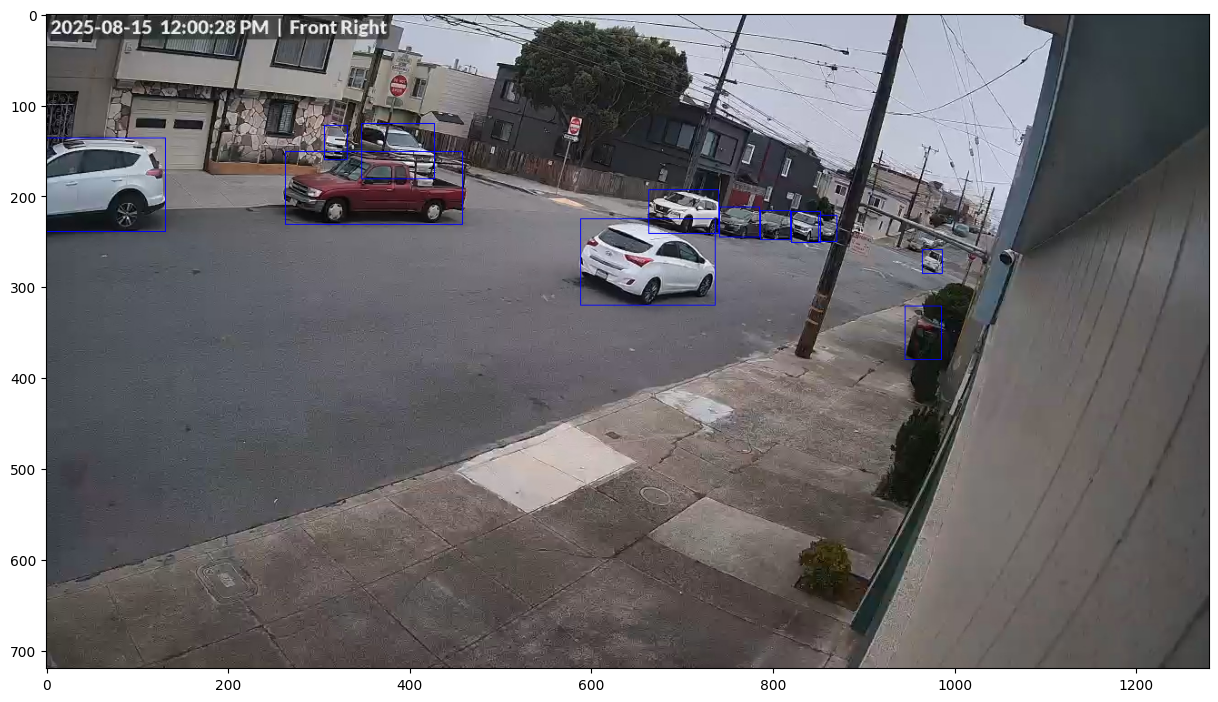

In [272]:
conf = results[0].boxes.conf.cpu().numpy()
coordinate = results[0].boxes.xyxy.cpu().numpy()

# ima_path = "test.jpg"
image = cv2.imread(ima_path)
count = 0
for (x1, y1, x2, y2) in coordinate.astype(int):
    cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=1)
    print(f"({conf[count]}) x1, y1, x2, y2: {x1, y1, x2, y2}")
    # print(f"({conf[count]})")
    count+=1

plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Deploy Models

In [ ]:
rf = Roboflow(api_key=rbflow_key)
project = rf.workspace().project("myprojectx-9vnw2")
version = project.version(1)
version.deploy(model_type='yolov8', 
               model_path='.', 
               filename='best.pt')

loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [8]:
print(type('new.jpg'))
import time

<class 'str'>


## Run model on RTSP

In [ ]:

spot1 = np.array([[260, 200], [260, 230], [450, 230], [450, 200]], np.int32)    
spot1 = spot1.reshape((-1,1,2))

spot2 = np.array([[630, 220], [690, 240], [730,240], [690 ,225]], np.int32)
spot2 = spot2.reshape((-1,1,2))
model = YOLO('runs/detect/train5/weights/best.pt').to(0)

cap = cv2.VideoCapture(camera_address)
# print("GPU name:", torch.cuda.get_device_name(0))
# print(ultralytics.__version__) 
if not cap.isOpened():
    print("Error: Could not Open RTSP stream.")
    exit()
else:
    print("It is opened!!")

while True:
    ret, frame = cap.read() # Read a frame


    if not ret:
        print("Error: Failed to read frame or stream ended.")
        break
    
    results = model.predict(source=frame, conf=0.6, iou = 0.45)          

   
    cv2.imshow('RTSP Stream', results[0].plot()) # Display the frameq

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


It is opened!!

0: 384x640 1 Truck, 9 Vehicles, 10.4ms
Speed: 1.2ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Truck, 8 Vehicles, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Truck, 8 Vehicles, 9.0ms
Speed: 1.2ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Truck, 8 Vehicles, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Truck, 9 Vehicles, 10.2ms
Speed: 1.0ms preprocess, 10.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Truck, 10 Vehicles, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Truck, 10 Vehicles, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Truck, 10 Vehicl

## Testing

In [48]:
import datetime as dt

current_time = dt.datetime.now()
day_of_week = dt.datetime.today().weekday()
print(current_time)
print(day_of_week)

2025-08-09 21:51:49.607370
5


In [172]:
# while True:
print(type(results[0].plot()))

print(type(image))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [276]:
import time

start_time = time.monotonic()

time.sleep(2)

end_time = time.monotonic()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 2.0 seconds
